In [4]:
from multi_funcs import *
from funcs import *
from tarjan_alg import *
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd

In [2]:
ks = [20,25]
ns = [8000,10000]

for i in ks:
    for j in ns:
        results = gs_f_simulate(100, j, i)
        make_df_cycles(j, i, results, save=True, path = 'data/simulations/larger/')

In [28]:
mdf_np(10000,25)

,0,1,2,3,4,5,6,7,8,9,...,rank17,rank18,rank19,rank20,rank21,rank22,rank23,rank24,rank25,underdemanded
0,5524,9613,1457,9989,7377,1062,5360,7310,4941,7025,...,0.023461,0.712811,0.708441,0.576188,0.259416,0.425694,0.790281,0.345216,0.511598,True
1,1787,1957,6393,8055,4699,3003,3027,6223,7506,496,...,0.286113,0.685335,0.925235,0.693195,0.136902,0.460167,0.864693,0.555605,0.395736,True
2,3218,7091,4680,7699,7542,6161,7678,7345,422,4301,...,0.399855,0.365276,0.947229,0.817917,0.985264,0.036104,0.964272,0.873334,0.935060,True
3,3931,3804,8234,3401,2569,9952,2584,5690,1665,3057,...,0.004809,0.973380,0.411713,0.520908,0.603375,0.339515,0.821943,0.027055,0.863734,True
4,5333,4961,9033,6652,8401,6825,6490,630,8749,4004,...,0.009380,0.919082,0.351503,0.551122,0.292294,0.748032,0.273812,0.971704,0.151487,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2472,9644,7254,6475,8654,5757,9595,323,2694,5312,...,0.633460,0.997126,0.576366,0.290995,0.269513,0.208050,0.130171,0.378319,0.117314,True
9996,34,1512,8075,1551,9414,9396,9596,2950,6676,128,...,0.153452,0.396116,0.987624,0.867193,0.559750,0.653324,0.832709,0.495366,0.101777,True
9997,2153,8660,8248,2418,9896,3149,1048,2736,4711,870,...,0.290632,0.185150,0.679990,0.339790,0.609687,0.550530,0.409787,0.614741,0.599542,True
9998,4849,9989,2782,896,3208,2295,1756,956,8735,7877,...,0.007940,0.339090,0.985184,0.391049,0.616904,0.999641,0.018493,0.063550,0.016336,True


In [ ]:
onlyfiles = [f for f in listdir('data/simulations/larger')]

In [2]:
for ks in [2,3,4]:
    for n in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
        results = gs_f_simulate(1000, n, ks)
        make_df_cycles(n, ks, results, save=True, path = 'data/simulations/graph1/')

In [21]:
results = gs_f_simulate(1000, 9000, 2)
make_df_cycles(9000, 2, results, save=True, path = 'data/simulations/graph1/')

,n,k,n_cycles,n_agents_in_cycles,n_matches,percent_in_cycles
0,9000,2,0,0,6961,0.0
1,9000,2,0,0,6981,0.0
2,9000,2,0,0,6979,0.0
3,9000,2,0,0,6906,0.0
4,9000,2,0,0,6945,0.0
...,...,...,...,...,...,...
995,9000,2,0,0,6966,0.0
996,9000,2,0,0,6975,0.0
997,9000,2,0,0,6946,0.0
998,9000,2,0,0,6951,0.0


In [22]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('data/simulations/graph1')]

In [23]:
df = concat(onlyfiles, 'data/simulations/graph1/')

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df2 = df.groupby(['n','k'], as_index=False).mean()

In [26]:
df2['value'] = 1/df2['percent_in_cycles']

Text(0.5, 1.0, 'k=4')

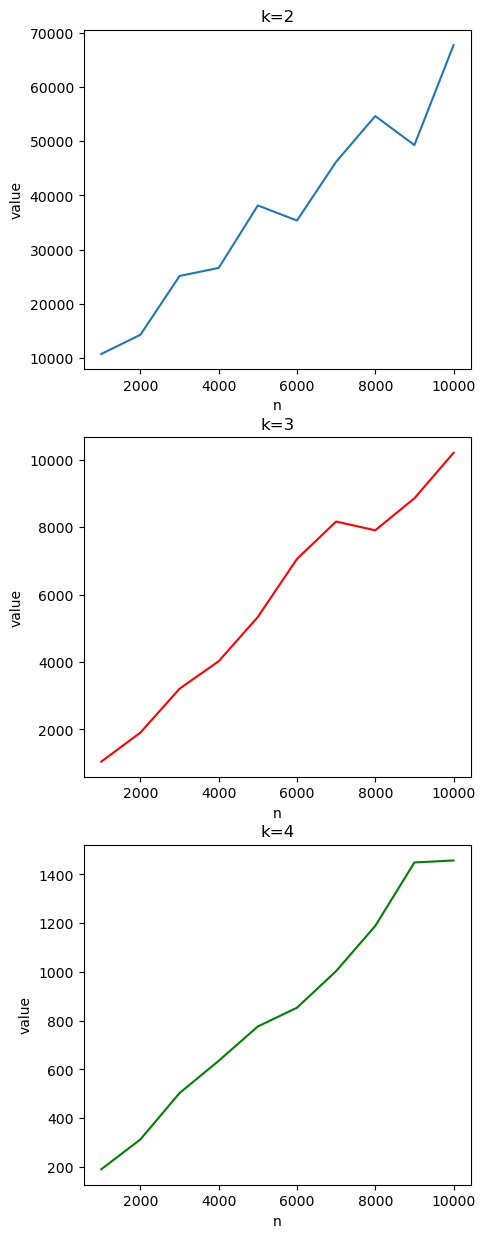

In [28]:
fig, axs = plt.subplots(3, 1, figsize=(5, 15))
sns.axes_style("whitegrid")
sns.lineplot(x = 'n', y = 'value', data = df2[df2['k']==2], ax=axs[0])
sns.lineplot(x = 'n', y = 'value', data = df2[df2['k']==3],color = 'red', ax=axs[1])
sns.lineplot(x = 'n', y = 'value', data = df2[df2['k']==4], color= 'green',ax=axs[2])
axs[0].set_title('k=2')
axs[1].set_title('k=3')
axs[2].set_title('k=4')

In [4]:
ns = list(np.arange(50,1025,25))
ks = list(np.arange(3,9,1))

for n in ns:
    for k in ks:
        results = gs_f_simulate(1000, n, k)
        make_df_cycles(n, k, results, save=True, path = 'data/simulations/graph2/')

In [5]:
onlyfiles2 = [f for f in listdir('data/simulations/graph2')]

In [7]:
df = concat(onlyfiles2, 'data/simulations/graph2/')

In [8]:
df

,Unnamed: 0,n,k,n_cycles,n_agents_in_cycles,n_matches,percent_in_cycles
0,0,1000,3,0,0,843,0.000000
1,1,1000,3,0,0,844,0.000000
2,2,1000,3,0,0,845,0.000000
3,3,1000,3,0,0,836,0.000000
4,4,1000,3,0,0,846,0.000000
...,...,...,...,...,...,...,...
237995,995,975,8,2,265,927,0.285868
237996,996,975,8,1,310,924,0.335498
237997,997,975,8,1,255,928,0.274784
237998,998,975,8,1,302,935,0.322995


<Axes: xlabel='n', ylabel='percent_in_cycles'>

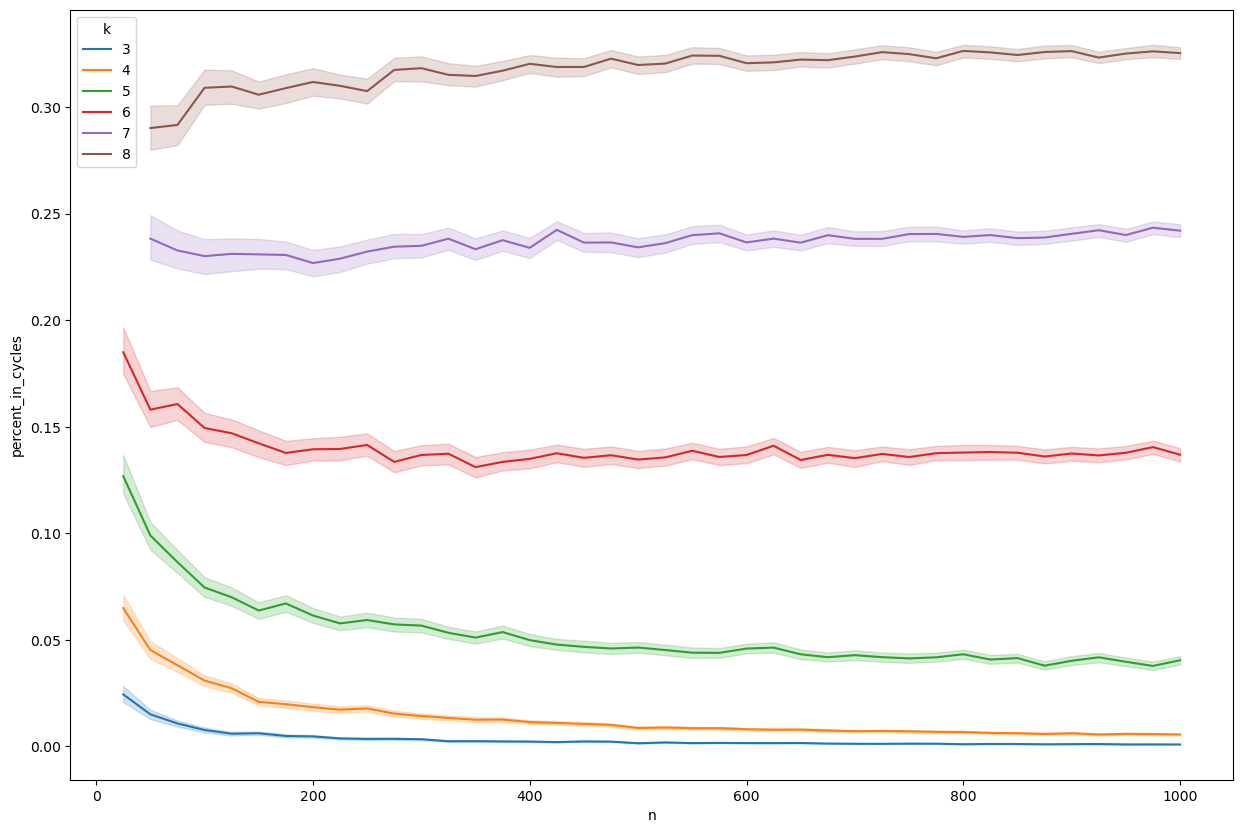

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x="n", y="percent_in_cycles", hue="k", data=df, ax=ax, palette="tab10", errorbar=("ci", 95))
